# Lec06-2. seaborn 차트 시각화
* <b>matplotlib : https://matplotlib.org/stable/
* <b>seaborn : https://seaborn.pydata.org/
* <b>plotly : https://plotly.com/python/
* <b>folium : https://python-visualization.github.io/folium/latest/
* 연습용 : https://wikidocs.net/92071
* 연습용 : https://www.kaggle.com/code/barisscal/eda-visualization-with-seaborn

In [1]:
# ! pip install matplotlib seaborn plotly folium

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings(action='ignore')

#-------------------- 차트 관련 속성 (한글처리, 그리드) -----------
plt.rcParams['font.family']= 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False


# 단일차트

## ★라인 그래프 : sns.lineplot()
* plt.plot()
* ci(confidence interval) 또는 errorbar : 신뢰구간 95%

In [3]:
df = sns.load_dataset("fmri")
print(df.shape)
df.head(3)

(1064, 5)


,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033


In [4]:
df['region'].value_counts()

region
parietal    532
frontal     532
Name: count, dtype: int64

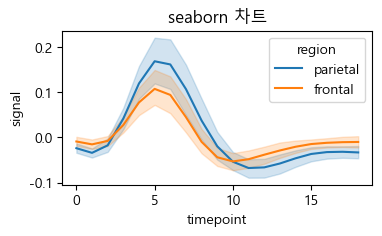

In [5]:
plt.figure(figsize=(4, 2))

sns.lineplot(x="timepoint", y="signal", hue="region", data=df                )         #------ sns 라인그래프
#sns.lineplot(x="timepoint", y="signal", hue="region", data=df, ci=None      )         #------ sns 라인그래프
#sns.lineplot(x="timepoint", y="signal", hue="region", data=df, errorbar=None)         #------ sns 라인그래프

#XXXXXXXXXXXXXX plt.plot(df.loc[ df['region']=='parietal' ,'timepoint'],     df.loc[df['region']=='parietal', 'signal'])  

plt.title("seaborn 차트")
plt.show()

## ★막대 그래프 : sns.barplot()
* plt.bar()

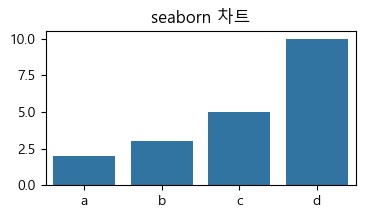

In [6]:
#x = [1, 2, 3, 4]
x = ['a', 'b','c','d']
y = [2, 3, 5, 10]
plt.figure(figsize=(4, 2))

sns.barplot(x=x, y=y)        #---------------------------- sns     막대그래프
#plt.bar(x, y)               #---------------------------- matplot 막대그래프

plt.title("seaborn 차트")
plt.show()

## ★★산점도 : sns.scatterplot()
* plt.scatter()

In [7]:
df.head(2)

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883


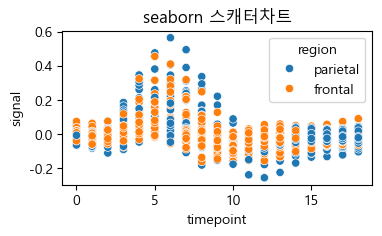

In [8]:
plt.figure(figsize=(4, 2))

#sns.scatterplot(x=df["timepoint"], y=df["signal"], hue=df["region"])  #---------------------------- sns        산점도
sns.scatterplot(x="timepoint", y="signal", hue="region", data=df)      #---------------------------- sns        산점도
#plt.scatter(df["timepoint"], df["signal"])                            #---------------------------- matplotlib 산점도   

plt.title("seaborn 스캐터차트")
plt.show()

<Figure size 400x200 with 0 Axes>

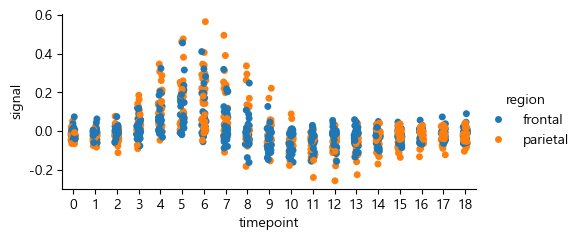

In [9]:
plt.figure(figsize=(4, 2))
sns.catplot(x="timepoint", y="signal", hue="region", data=df
            , kind="strip"        # ----------------------------------------------------------------
            , height=2.5          # 세로 길이 (인치)
            , aspect=2            # 가로 비율 = height * aspect → 2 * 2.5 = 5 인치
            , ci=None
           )
plt.show()

## ★★★히스토그램 : sns.histplot()
* plt.hist()
* <font color=red size=4><b>도수분포표 : 구간 사이의 누적값

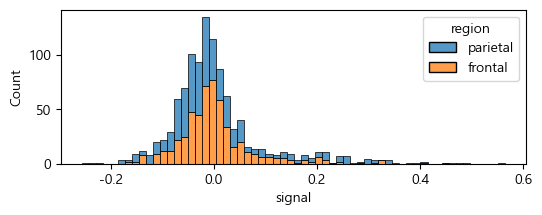

In [10]:
plt.figure(figsize=(6, 2))
sns.histplot(x="signal" , hue="region", data=df,
    multiple="stack",
    log_scale=False,
)
plt.show()

In [11]:
np.log(1000), np.log(100)

(np.float64(6.907755278982137), np.float64(4.605170185988092))

## 파이 차트 : 지원안함

In [12]:
# 없다

## ★★★히트맵 : sns.heatmap(df)
* plt.matshow() 
* <font color=red size=4><b>두 컬럼관의 관계 파악에 사용

In [13]:
fdf= sns.load_dataset("flights")
fdf.head(3)

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132


In [14]:
pvdf = fdf.pivot(index="month", columns="year", values="passengers") 
pvdf.head(3)

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112,115,145,171,196,204,242,284,315,340,360,417
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Mar,132,141,178,193,236,235,267,317,356,362,406,419


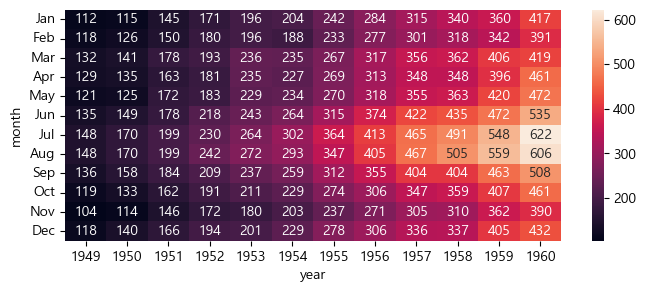

In [15]:
plt.figure(figsize=(8, 3))

sns.heatmap(pvdf, annot=True, fmt="d")     #---------------------------- sns 히트맵

plt.show()

## ★★★박스 플롯 : sns.boxplot()
* plt.boxplot()
* <font color=red size=4><b>이상치, 아웃라이어 데이터 선별에 최적화

### IQR (Interquartile Range)
* https://www.thedataschool.co.uk/lex-devlin/basic-statistics-interquartile-range-iqr/

<img src="https://www.thedataschool.co.uk/content/images/2023/09/IQR-Illustration.png" width=400>

### IQR 연습

* <b>데이터프레임.describe() 사용

In [16]:
data = range(0,11)
list(data)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [17]:
zz = pd.DataFrame( data , columns=["col"])
zz.describe()

,col
count,11.000000
mean,5.000000
std,3.316625
min,0.000000
25%,2.500000
50%,5.000000
75%,7.500000
max,10.000000


* <b>데이터프레임["컬럼"].quantile(0.25) 사용

In [18]:
zz["col"].quantile( [0.25, 0.50, 0.75] )

0.25    2.5
0.50    5.0
0.75    7.5
Name: col, dtype: float64

* <b> np.percentile( [ ], 25)

In [19]:
data = range(0,11)
np.percentile(data , [25,50,75] )

array([2.5, 5. , 7.5])

* <b>IQR = Q3 - Q1
* <b> 하한 : Q1 - 1.5IQR
* <b> 상한 : Q3 + 1.5IQR

In [20]:
data = range(0,11)
arr = np.percentile(data , [25,50,75] )
Q1 = arr[0]
Q3 = arr[2]
IQR = Q3 - Q1
print(Q1,Q3, IQR)
하한 = Q1 - (1.5*IQR)
상한 = Q3 + (1.5*IQR)
print(하한, 상한)

2.5 7.5 5.0
-5.0 15.0


### 박스플롯

In [21]:
tipdf = sns.load_dataset("tips")
tipdf.head(3)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3


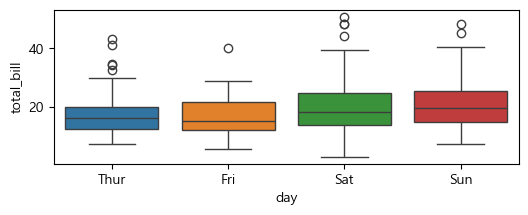

In [22]:
plt.figure(figsize=(6, 2))
sns.boxplot(x="day", y="total_bill", hue="day" ,  data=tipdf)
plt.show()

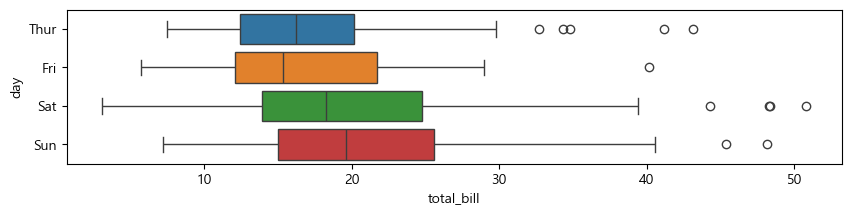

In [23]:
plt.figure(figsize=(10, 2))
sns.boxplot(x="total_bill", y="day", hue="day" ,  data=tipdf)
plt.show()

* day = Fri,  total_bill >= 30

In [24]:
#tipdf['day'] == "Fri"
#tipdf['total_bill'] >= 30
#df [ () & () ]
tipdf [ (tipdf['day'] == "Fri") & (tipdf['total_bill'] >= 30) ]

,total_bill,tip,sex,smoker,day,time,size
95,40.17,4.73,Male,Yes,Fri,Dinner,4


## 바이올린 플롯 : sns.violinplot()
* plt.violinplot()

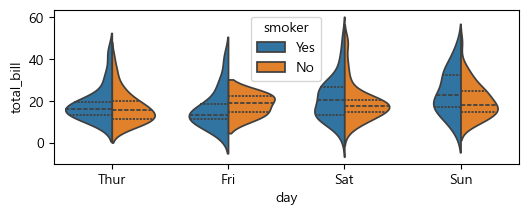

In [25]:
plt.figure(figsize=(6, 2))
sns.violinplot(x="day", y="total_bill", hue="smoker", data=tipdf,
               split=True, inner="quart", fill=True)
plt.show()

## 스웜플롯 : sns.swarmplot()

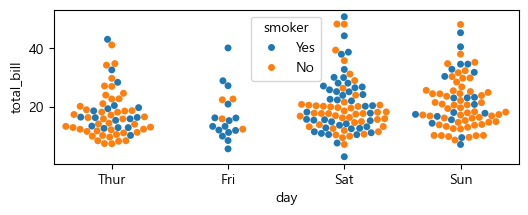

In [26]:
plt.figure(figsize=(6, 2))
sns.swarmplot(x="day", y="total_bill", hue="smoker", data=tipdf)
plt.show()

# 그외 차트
<pre>  catplot  
  lmplot
  displot
  kdeplot
  relplot
  stripplot
  residplot
 *pairplot
 *jointplot

 *PairGrid
 *JointGrid
  FacetGrid

## catplot()
* sns.catplot()은 내부적으로 FacetGrid를 자동 생성해서, 여러 플롯을 반복해서 그림
* sns.catplot(...)&nbsp; &nbsp;== &nbsp;&nbsp;  g=sns.FacetGrid(...)  g.map(...)
 
<pre>
"strip"	   산점도처럼 개별 데이터를 점으로 찍어줍니다. (기본값 == scatter)
"swarm"	   개별 점을 겹치지 않도록 퍼뜨려서 찍는 산점도입니다. (값이 많을 때 좋음)
    
"box"	   박스플롯. 중앙값, 사분위수, 이상치 등을 보여줍니다.
"violin"   바이올린 플롯. 박스플롯 + 밀도곡선 (분포를 직관적으로 볼 수 있음)
"boxen"	   대용량 데이터용 박스플롯. (좀 더 정밀한 분포 표현)
    
"point"	   평균값에 선 연결 + 오차막대를 함께 그려주는 점 그래프
    
"bar"	   막대그래프 (Bar plot). 평균값 + 오차막대
"count"	   빈도수 막대그래프. y값 없이 x값의 개수(count)를 자동으로 센 그래프 (like sns.countplot)

In [27]:
pgdf = sns.load_dataset("penguins")
print(pgdf.shape)
pgdf.head(3)

(344, 7)


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female


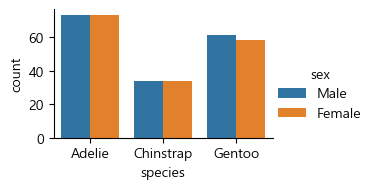

In [28]:
# plt.figure(figsize=(5, 2))  ---- catplot() 자체에서 속성으로 지정
sns.catplot(x="species",  hue="sex", data=pgdf
            , kind="count"        # ---------------------- strip swarm box violin boxen point bar count
            , height=2          # 세로 길이 (인치)
            , aspect=1.5        # 가로 비율 = height * aspect → 2 * 2.5 = 5 인치
            , ci=None
           )
plt.show()

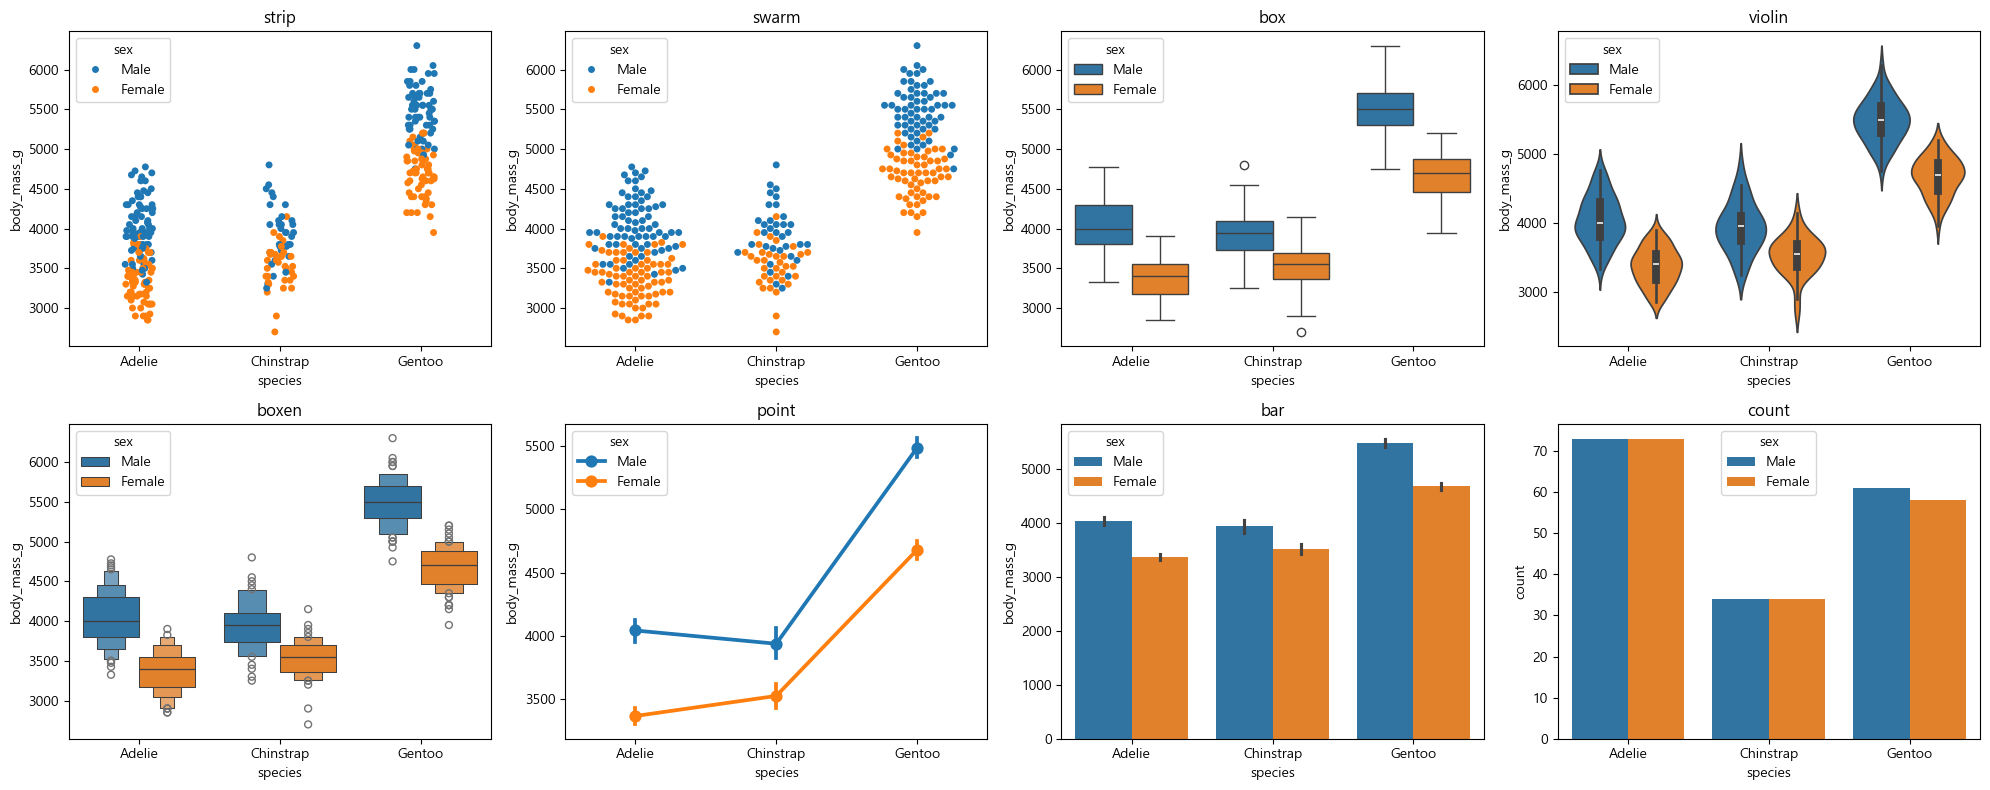

In [29]:
plot_funcs = {
    'strip' : sns.stripplot,
    'swarm' : sns.swarmplot,
    'box'   : sns.boxplot,
    'violin': sns.violinplot,
    'boxen' : sns.boxenplot,
    'point' : sns.pointplot,
    'bar'   : sns.barplot,
    'count' : sns.countplot,
}

fig, axes = plt.subplots(2, 4, figsize=(20, 8))
axes = axes.flatten()

CHART_KINDS_LIST = ['strip', 'swarm', 'box', 'violin', 'boxen', 'point', 'bar', 'count']
for ax, kind in zip(axes, CHART_KINDS_LIST):
    plot_obj = plot_funcs[kind]
    if kind == 'count':
        plot_obj(x="species",                  hue="sex", data=pgdf, ax=ax)
    else:
        plot_obj(x="species", y="body_mass_g", hue="sex", data=pgdf, ax=ax)
    ax.set_title(kind)

plt.tight_layout()
plt.show()

## 선형회귀

### ★sns.regplot()
* <font color=red><b> 선형 회귀 모델(linear regression) 시각화 :: 개별 회귀선 분석에 적합
* 회귀선 + 산점도(scatter plot)
* hue, col, row 지원안됨

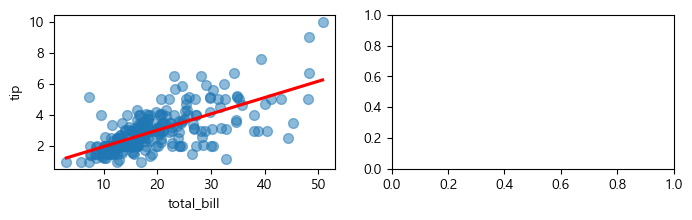

In [30]:
#plt.figure(figsize=(8, 2))   
#fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 2))
fig, ax = plt.subplots(1, 2, figsize=(8, 2))
sns.regplot(
    x="total_bill", 
    y="tip", 
    data=tipdf
     , ax = ax[0]           #서브플롯 지원 -------------------------------
     , ci = True            #신뢰구간 표시여부
     , fit_reg = True       #회귀선 표시여부   
     , scatter = True       #스캐터 표시여부
     , scatter_kws={"s": 50, "alpha": 0.5}
     , line_kws={"color": "red"}
)
plt.show()

###  ★sns.lmplot()
* <font color=red><b> 선형 회귀 모델(linear regression) 시각화 :: 여러 그룹 비교, FacetGrid 사용 시 적합
* <font color=red><b> regplot() + hue
* 회귀선 + 신뢰 구간

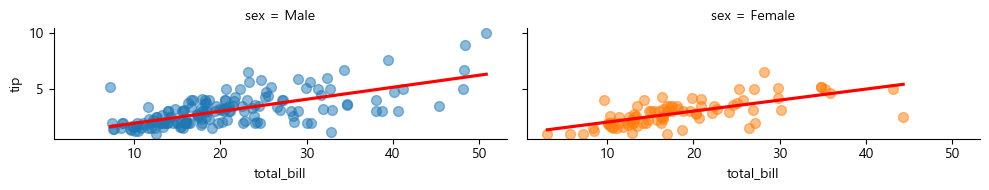

In [31]:
tipdf = sns.load_dataset("tips")

#plt.figure(figsize=(6, 2))    XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
sns.lmplot(
    x="total_bill", 
    y="tip", 
    hue="sex",
    data=tipdf
     , col="sex"        #컬럼별 분리해서 그리기
     , ci = True        #신뢰구간 표시여부
     , fit_reg = True   #회귀선 표시여부   
     , height=2         # 각 subplot의 세로 길이 (인치)
     , aspect=2.5       # 가로 길이 = height × aspect)
     , scatter_kws={"s": 50, "alpha": 0.5}
     , line_kws={"color": "red"}
)
plt.show()

### sns.residplot()
* <font color=red><b> 선형 회귀 모델(linear regression) 잔차 시각화
* <font size=4 color=red><b>잔차가 y=0 근처에 고르게 분포할수록 좋은 모델
* <font size=4 color=red><b>특정 구간에서만 큰 잔차 → 이상치, 모델 적합 불량
* U자형 또는 곡선 패턴 → 비선형성
* 잔차(residual) = 실제 값 − 예측 값
* X축은 범주형 컬럼 사용 금지

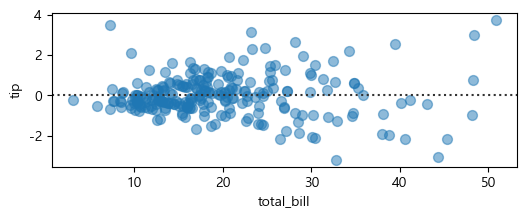

In [32]:
plt.figure(figsize=(6, 2))  

sns.residplot(
    x="total_bill",
    y="tip",
    data=tipdf
    , scatter_kws={"s": 50, "alpha": 0.5}
    , line_kws={"color": "red"}
)
plt.show()

## 분포도

### sns.displot()
* <font color=red><b>분포(distribution) 시각화

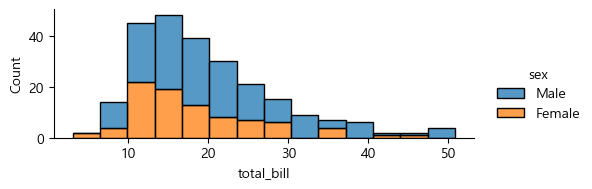

In [33]:
#plt.figure(figsize=(4, 2))    XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX

sns.displot(
    x = "total_bill",
    hue="sex",
    data=tipdf
    ,kind= "hist"            # 그래프 종류: "hist"(기본), "kde", "ecdf" 등
    ,multiple = "stack"      # hue그룹 겹치는 방식 : layer", "dodge", "stack" 등
    , height=2               # 각 subplot의 세로 길이 (인치)
    , aspect=2.5             # 가로 길이 = height × aspect)
)
plt.show()

### sns.kdeplot()
* <font color=red><b>분포(distribution) 시각화
* 커널 밀도 추정(Kernel Density Estimation, KDE)

In [34]:
tipdf

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


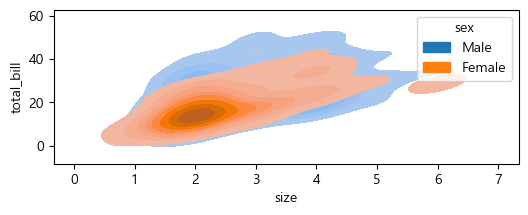

In [35]:
plt.figure(figsize=(6, 2))  

sns.kdeplot(
    x = "size",
    y = "total_bill",
    hue="sex",
    data=tipdf
    ,fill = True             # KDE 아래 채움 (면적 그래프)
    ,multiple = "stack"      # hue그룹 겹치는 방식 : layer", "dodge", "stack" 등
  
)
plt.show()

### sns.stripplot()
* <font color=red><b>분포(distribution) 시각화
<pre>
swarmplot()(덜 겹침),     boxplot() (요약),    violinplot() (밀도)

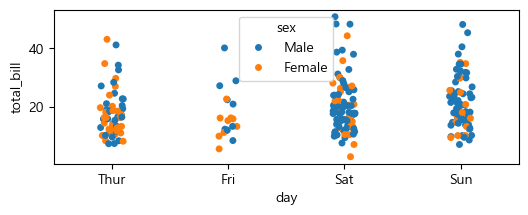

In [36]:
plt.figure(figsize=(6, 2))  

sns.stripplot(
    x="day",
    y="total_bill",
    hue="sex",
    data=tipdf
    ,jitter=True    #겹침방지(swam차트 유사)
)
plt.show()

## 변수 관계도
* heatmap 강추

### sns.relplot()
* <font color=red><b>변수간 관계 시각화
* <font color=red><b>scatter + hue + (row + col)
* 여러 변수 간 관계를 하나의 plot 또는 여러 개의 facet plot으로 시각화
* 내부적으로 sns.scatterplot() 또는 sns.lineplot()
<pre><font size=4><b>relplot vs scatterplot vs lineplot</b></font>
relplot()       관계형 시각화의 상위 함수     subplot/facet 지원 (col, row)
scatterplot()	산점도	                    세부 설정 자유로움, subplot 사용 시 ax= 가능
lineplot()      선 그래프                    시계열 데이터에 유용   

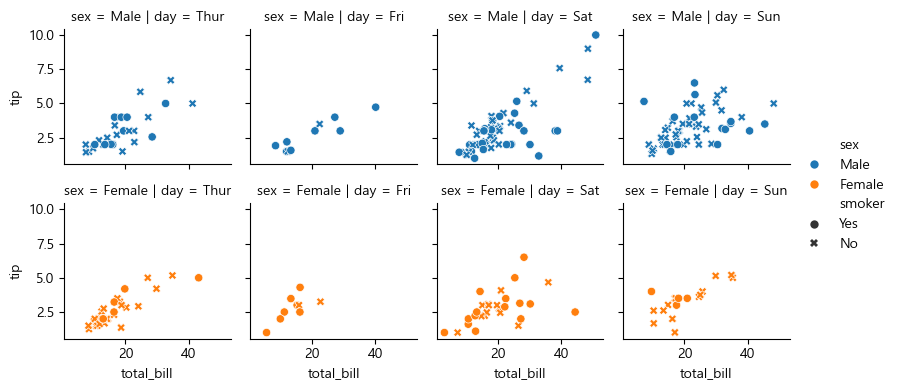

In [37]:
#plt.figure(figsize=(4, 2))    XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX

sns.relplot(
    x="total_bill",
    y="tip",
    hue="sex",
    data=tipdf
    , style="smoker"
    , row = "sex"
    , col = "day"
    , kind = "scatter"      # 종류 : scatter(기본)  ,  line  
    , height=2              # 각 subplot의 세로 길이 (인치)
    , aspect=1              # 가로비율 (가로 = height × aspect)
)
plt.show()

## @sns.pairplot()
* <font size=5 color=red><b>★★★ 메모리릭 주의 주의 주의
* <font color=red><b>수치형 변수들 간의 상관 관계 시각화
* 각 변수 쌍 산점도(scatter plot) + 대각선(diagonal) 히스토그램(histogram)

In [38]:
iris = sns.load_dataset("iris")
iris.head(3)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa


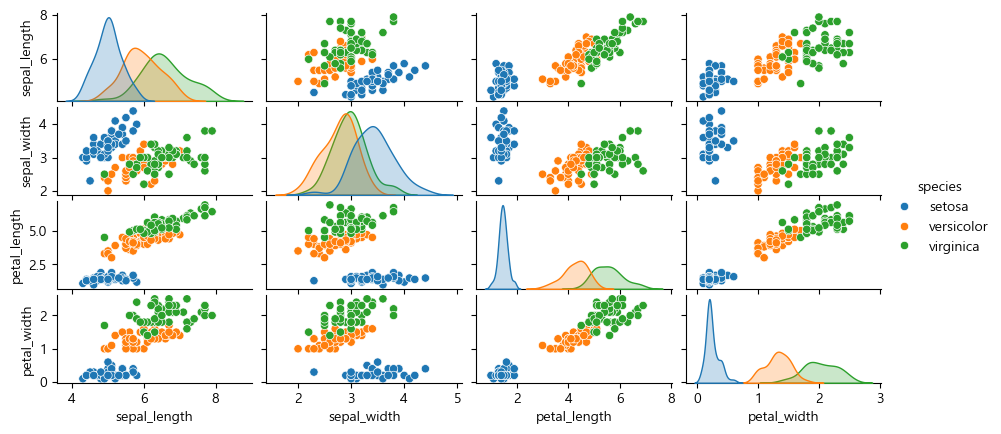

In [39]:
#plt.figure(figsize=(4, 2))    XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX

g = sns.pairplot(data = iris,
                 hue="species" 
                 , diag_kind="kde"            #대각선 그래프 종류: "hist"(기본), "kde"
            )
g.fig.set_size_inches(10, 4)                  #여기서 사이즈 조정
plt.show()

## @sns.jointplot()
* <font color=red><b>분포(distribution) 시각화 :: 두 변수 간의 관계
*  상단/우측(히스토그램 or KDE) + 중앙(산점도)

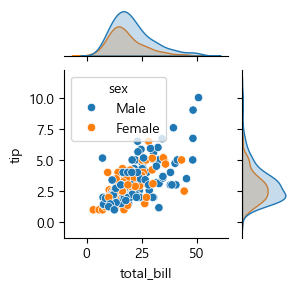

In [40]:
#plt.figure(figsize=(4, 2))    XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX

sns.jointplot(
    x="total_bill",
    y="tip",
    hue = "sex",
    data=tipdf
    ,kind = "scatter"              #"scatter" (기본), "kde", "hist", "hex", "reg", "resid"
    ,height=3                      #높이 (일반적으로 정사각형 비율로 출력)
    ,ratio=3                       #히스토그램 크기 비율
    ,space=0.3
)

plt.show()

* <b>비추 비추 비추 : 직사각형으로 꼭~~ 그려보겠다 

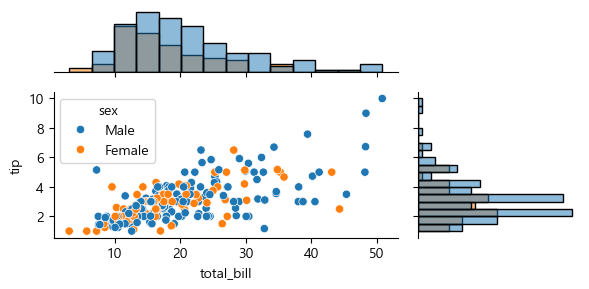

In [41]:
g = sns.JointGrid(x="total_bill",
                  y="tip",
                  hue = "sex",
                  data=tipdf
                  ,height=5
                  ,ratio=2
                 )
#g.plot(sns.histplot, sns.histplot)      #"scatter" (기본), "kde", "hist", "hex", "reg", "resid"
g.plot(sns.scatterplot, sns.histplot)    #"scatter" (기본), "kde", "hist", "hex", "reg", "resid"

g.fig.set_size_inches(6, 3)              # 여기서 직사각형으로 강제 설정
g.fig.tight_layout()

# 그리드
<pre>
  FacetGrid
 *PairGrid
 *JointGrid

## @PairGrid()
* pairplot()과 유사 (더 세밀)
* <b>PairGrid(고급자용:일일이 설정)      vs pairplot(초급자용:자동 설정)
| 항목        | `pairplot()`            | `PairGrid()`         |
| --------- | ----------------------- | -------------------- |
| 사용 목적     | 빠르고 간단하게 시각화            | **자세하게 커스터마이징**      |
| 대각선 그래프   | 자동 선택 (`hist` 또는 `kde`) | 직접 지정 (`map_diag()`) |
| 하단/상단 그래프 | 자동으로 동일                 | 각각 다른 plot 지정 가능     |
| 범례, 색상    | 자동 생성                   | 수동 (`add_legend()`)  |
| 레이아웃 설정   | 자동                      | 더 유연하게 설정 가능         |
    

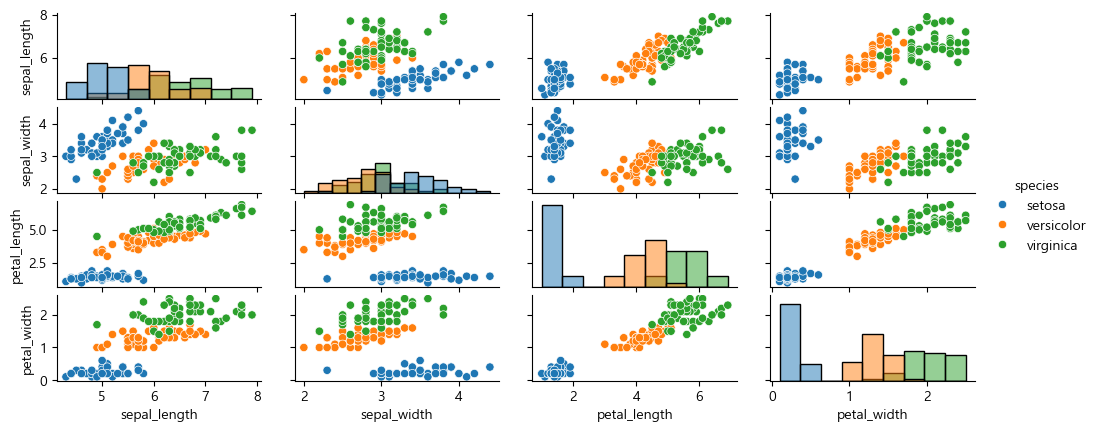

In [42]:
#plt.figure(figsize=(4, 2))    XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX

#-------------------------------------------------------
#              pairplot(초급자용:자동)
#-------------------------------------------------------
# g = sns.pairplot(data = iris,
#                  hue="species" 
#                  , diag_kind="kde"            #대각선 그래프 종류: "hist"(기본), "kde"
#                 )
# g.fig.set_size_inches(10, 4)                  # 여기서 사이즈 조정
# plt.show()

#-------------------------------------------------------
#              PairGrid(고급자용:일일이 설정)
#-------------------------------------------------------
iris = sns.load_dataset("iris")
g = sns.PairGrid(data = iris,  hue="species")

g.map_diag(sns.histplot)                  #대각선(diagonal) 히스토그램(histogram)
g.map_offdiag(sns.scatterplot)            #각 변수 쌍 산점도(scatter plot) 
g.fig.set_size_inches(10, 4)              #여기서 사이즈 조정
g.add_legend()                            #범례보이기

plt.show()

## @JointGrid()

* jointplot()과 유사 (더 세밀)
* <b>JointGrid(고급자용:일일이 설정)      vs jointplot(초급자용:자동 설정)

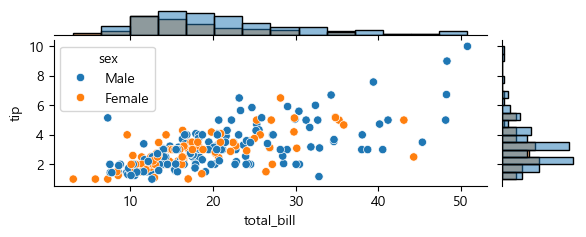

In [43]:
#plt.figure(figsize=(4, 2))    XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX

#-------------------------------------------------------
#              jointplot(초급자용:자동)
#-------------------------------------------------------
# sns.jointplot(
#     x="total_bill",
#     y="tip",
#     hue = "sex",
#     data=tipdf
#     ,kind = "scatter"              #"scatter" (기본), "kde", "hist", "hex", "reg", "resid"
#     ,height=3                      #높이 (일반적으로 정사각형 비율로 출력)
#     ,ratio=3                       #히스토그램 크기 비율
#     ,space=0.3
# )


#-------------------------------------------------------
#              JointGrid(고급자용:일일이 설정)
#-------------------------------------------------------
g = sns.JointGrid(x="total_bill", 
                  y="tip",
                  hue = "sex",
                  data=tipdf )

g.plot_joint(sns.scatterplot)            #중앙(산점도)
g.plot_marginals(sns.histplot)           #상단/우측(히스토그램 or KDE) 
g.fig.set_size_inches(6, 2)              # 여기서 사이즈 조정

plt.show()

## FacetGrid
* 데이터를 여러 조건(범주)에 따라 분할하여, 각 조건마다 별도의 그래프(서브플롯)를 그릴 수 있게 해주는 클래스
<pre>
row / col	 : 데이터의 어떤 변수로 행/열을 나눌지 지정
hue	         : 색상으로 구분할 변수
map()	     : 어떤 시각화 함수를 그릴지 지정
add_legend() : 범례 추가
fig, axes	 : 내부적으로 Matplotlib의 Figure 및 Subplots 사용

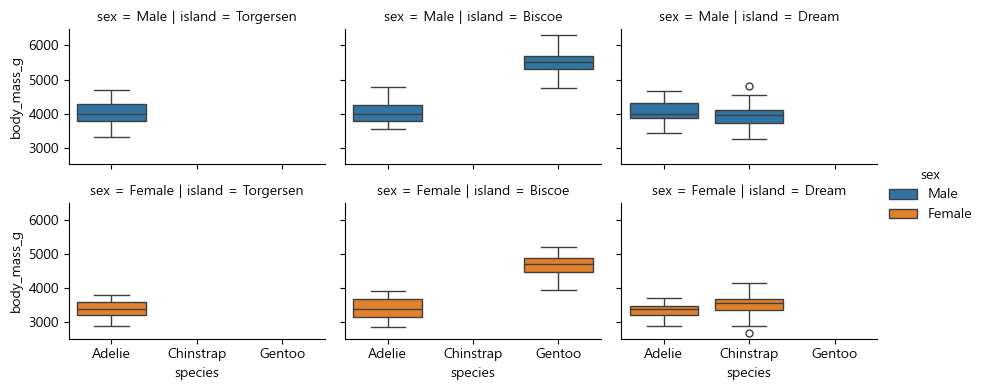

In [44]:
pgdf = sns.load_dataset("penguins")

#plt.figure(figsize=(6, 2))    XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX

sns.catplot(
    x="species", 
    y="body_mass_g",
    hue="sex", 
    data=pgdf, 
    
    row="sex",      # 성별로 행을 나눔
    col="island",   # island별로 열을 나눔
    kind="box"
    , height=2      # 각 subplot의 세로 길이 (인치)
    , aspect=1.5    # 가로 길이 = height × aspect)
)
plt.show()

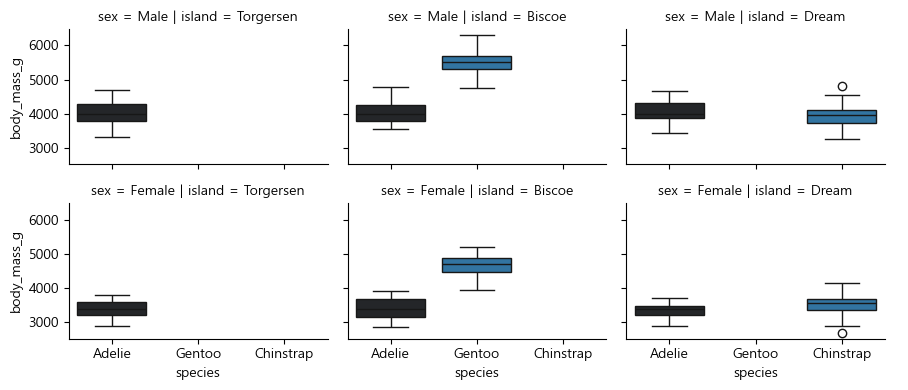

In [45]:
# FacetGrid 객체 생성
g = sns.FacetGrid(pgdf, row="sex",  col="island" 
                  , height=2      # 각 subplot의 세로 길이 (인치)
                  , aspect=1.5    # 가로 길이 = height × aspect)
                 )

# 그래프 종류 지정 (countplot 등)
#g.map(sns.countplot, "species")
#g.map(sns.boxplot, "species", "body_mass_g")
g.map_dataframe(func=sns.boxplot, x="species", y="body_mass_g", hue="species")

# 범례 추가
g.add_legend()
plt.show()